In [19]:
#Import the required modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

In [20]:
#Import the dataset
#show dataset

data_frame =pd.read_csv('Data.csv')
data_frame

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,Yes,No,1,No,No,0,No,...,No,No,No,No,0,Yes,0,29.85,29.85,No
1,1,0,0,No,No,34,Yes,No,0,Yes,...,Yes,No,No,No,1,No,1,56.95,1889.50,No
2,2,0,0,No,No,2,Yes,No,0,Yes,...,No,No,No,No,0,Yes,1,53.85,108.15,Yes
3,3,0,0,No,No,45,No,No,0,Yes,...,Yes,Yes,No,No,1,No,2,42.30,1840.75,No
4,4,1,0,No,No,2,Yes,No,1,No,...,No,No,No,No,0,Yes,0,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,0,Yes,Yes,24,Yes,Yes,0,Yes,...,Yes,Yes,Yes,Yes,1,Yes,1,84.80,1990.50,No
7028,7039,1,0,Yes,Yes,72,Yes,Yes,1,No,...,Yes,No,Yes,Yes,1,Yes,3,103.20,7362.90,No
7029,7040,1,0,Yes,Yes,11,No,No,0,Yes,...,No,No,No,No,0,Yes,0,29.60,346.45,No
7030,7041,0,1,Yes,No,4,Yes,Yes,1,No,...,No,No,No,No,0,Yes,1,74.40,306.60,Yes


In [21]:
#Convert all columns have Yes or No to 0 and 1

data_frame = data_frame.replace(to_replace = ['Yes','No'],value = ['1','0'])
data_frame

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,2,0,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,3,0,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,4,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,0,1,1,24,1,1,0,1,...,1,1,1,1,1,1,1,84.80,1990.50,0
7028,7039,1,0,1,1,72,1,1,1,0,...,1,0,1,1,1,1,3,103.20,7362.90,0
7029,7040,1,0,1,1,11,0,0,0,1,...,0,0,0,0,0,1,0,29.60,346.45,0
7030,7041,0,1,1,0,4,1,1,1,0,...,0,0,0,0,0,1,1,74.40,306.60,1


In [22]:
#Visualize the data
def Sctatter_plot():
    plt.scatter(data_frame.MonthlyCharges ,data_frame.Churn,cmap="rainbow")
    plt.title("Scatter plot for Logistic Regression")
    plt.show()

In [23]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data_frame.drop('Churn',axis=1), 
                                                    data_frame['Churn'], test_size=0.30, 
                                                    random_state=101)

In [24]:
#Perform LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
#Make prediction using the model and display the confusion_matrix

predictions=model.predict(X_test)
cm=metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1580
           1       0.63      0.56      0.60       530

    accuracy                           0.81      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [38]:
#Accuracy
score=model.score(X_test,y_test)
score

0.8071090047393364

In [39]:
# This method produces a more understandable and visually readable confusion matrix using seaborn
def plot():
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

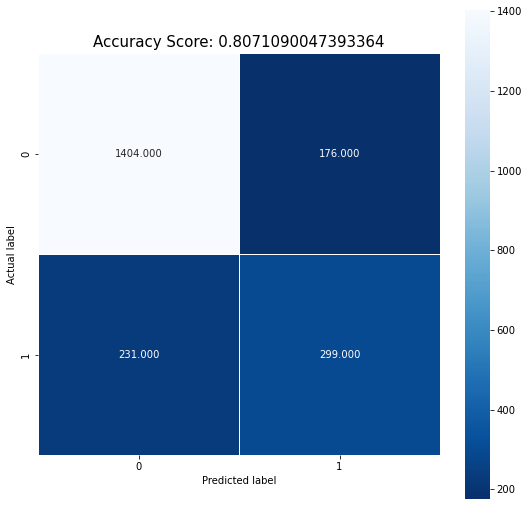

In [40]:
plot()